<a href="https://colab.research.google.com/github/Aathithyan23/Agricultural-Raw-Material-Analysis/blob/main/Agricultural_Raw_Material_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/agricultural_raw_material.csv")

**Handling missing values**


In [ ]:
# Check the first few rows
df.head()

# Get basic info about columns and data types
df.info()

# Check fo lar missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

,0
Month,0
Coarse wool Price,34
Coarse wool price % Change,34
Copra Price,22
Copra price % Change,22
Cotton Price,0
Cotton price % Change,0
Fine wool Price,34
Fine wool price % Change,34
Hard log Price,0


**Convert price columns to Numeric**

In [ ]:
# Convert columns to numeric, coercing errors to NaN
price_columns = [
    'Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price',
    'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
    'Soft sawnwood Price', 'Wood pulp Price'
]
percent_change_columns = [
    'Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change',
    'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
    'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change'
]

for col in price_columns + percent_change_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Identify High and Low price Materials**

In [ ]:
average_prices = df[price_columns].mean()
high_price_material = average_prices.idxmax()
low_price_material = average_prices.idxmin()

print(f"High price material: {high_price_material}, Average Price: {average_prices.max()}")
print(f"Low price material: {low_price_material}, Average Price: {average_prices.min()}")

High price material: Hard sawnwood Price, Average Price: 707.9503669724771
Low price material: Cotton Price, Average Price: 1.64


**High and low %change material**

In [ ]:
average_changes = df[percent_change_columns].mean()
high_change_material = average_changes.idxmax()
low_change_material = average_changes.idxmin()

print(f"High % change material: {high_change_material}, Average % Change: {average_changes.max()}")
print(f"Low % change material: {low_change_material}, Average % Change: {average_changes.min()}")

High % change material: nan, Average % Change: nan
Low % change material: nan, Average % Change: nan


<ipython-input-6-7607a4b094b2>:2: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  high_change_material = average_changes.idxmax()
<ipython-input-6-7607a4b094b2>:3: FutureWarning: The behavior of Series.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  low_change_material = average_changes.idxmin()


**Range of prices change over the years**

<ipython-input-12-4335ad7962ef>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce')


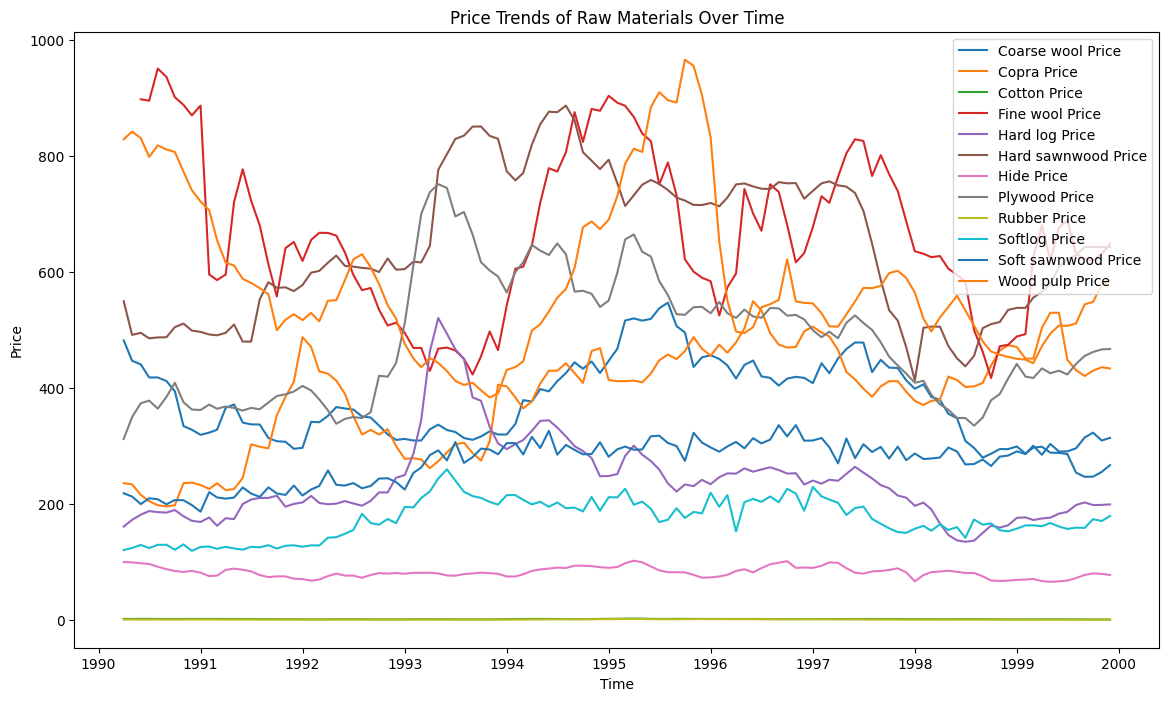

In [ ]:
# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

# Plot price trends for each material over time
plt.figure(figsize=(14, 8))
for col in price_columns:
    sns.lineplot(data=df, x="Month", y=col, label=col)

plt.title("Price Trends of Raw Materials Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.show()

**Correlation between them using heat map**

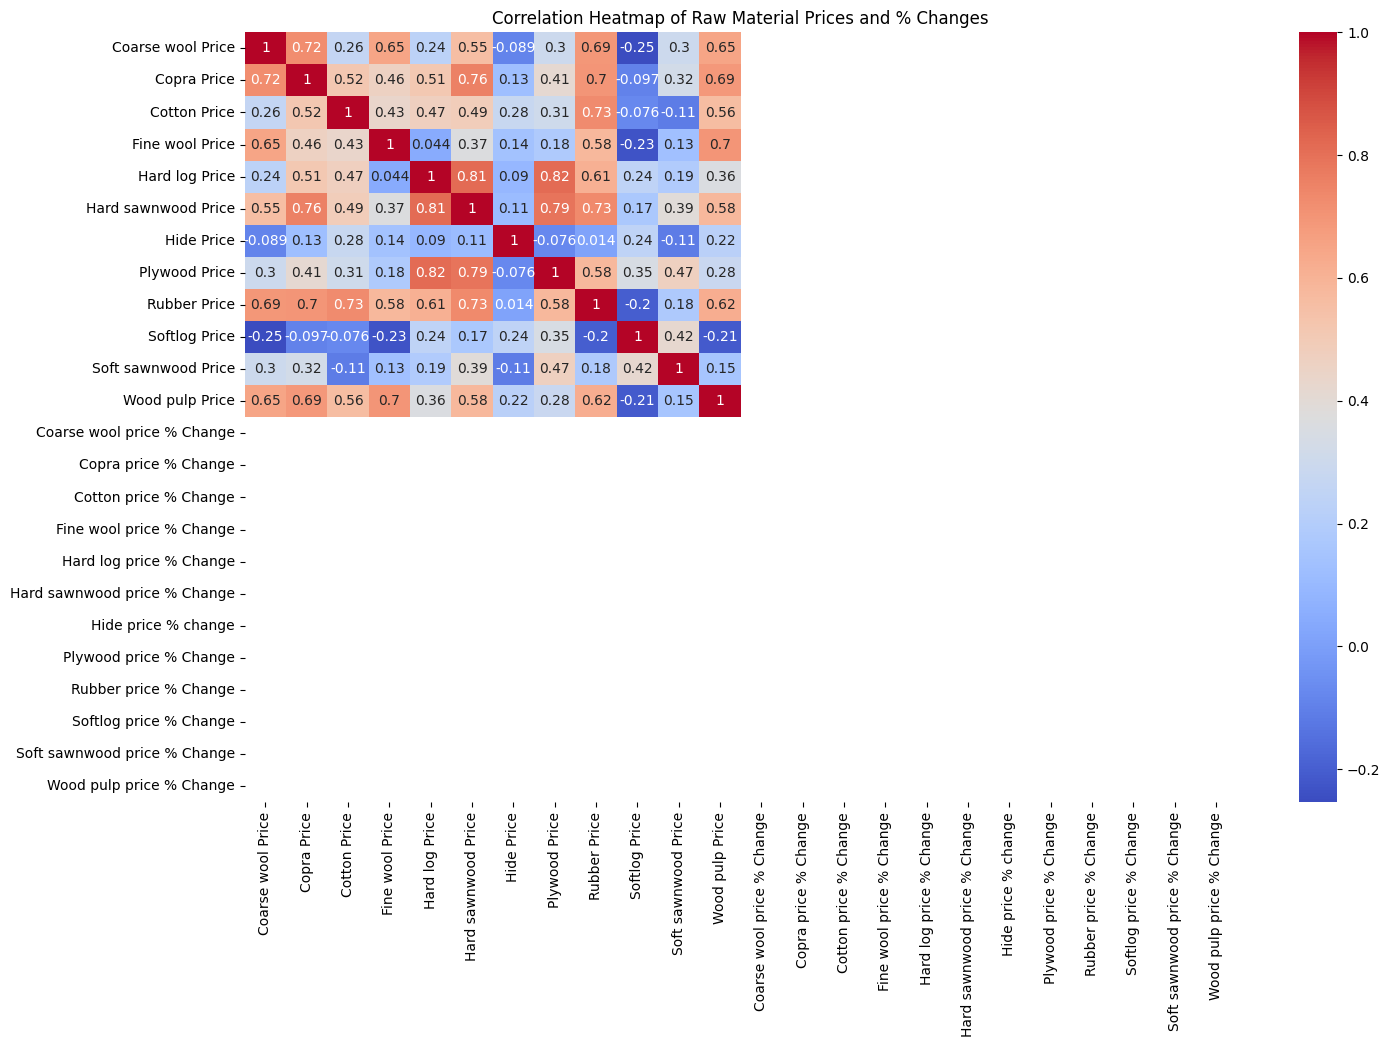

In [ ]:
# Combine price and % change columns
all_columns = price_columns + percent_change_columns

# Calculate correlation matrix
correlation_matrix = df[all_columns].corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Raw Material Prices and % Changes")
plt.show()